Analysis of [Telco's](http://telco.com.br/) customer database, with information about the attributes of its customers.

The intention is to predict customers with greater potential to leave the company.

The data is taken from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) and below is the information about the Dataset. 

" Telcom Customer Churn

The data was downloaded from IBM Sample Data Sets. 
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/ "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target." 



### Import the basic and required libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Read the data into a dataframe and split the target variable and features in two. 


In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
X = data.drop(['Churn'], axis=1)
y = pd.DataFrame(data.Churn)


In [4]:
y = pd.DataFrame(data.Churn)
print(X.shape)
print(y.shape)

(7043, 20)
(7043, 1)


#### We have 7000 instances and 20 features for predicting whether a customer churn or not? 

### Initial Data Analysis 

1. Check for the categorical and continuous features. 
2. Check for hte null values 

In [5]:
X.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [6]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


1. Continuous  = 'tenure', 'MonthlyCharges', 'TotalCharges'
2. Categorical = 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' 

In [7]:
X.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [8]:
y.isnull().sum()

Churn    0
dtype: int64

In [9]:
X.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [10]:
y.describe()

,Churn
count,7043
unique,2
top,No
freq,5174


Since, there are no null values, we can move ahead. 

## Data Visualization

In [11]:
## Check for the sekwedness in target variable

0.7346301292063041 0.2653698707936959


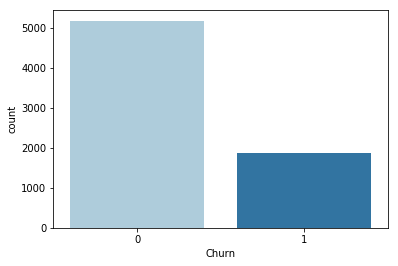

In [12]:
y = y.squeeze().apply(lambda x: 1 if x =='Yes' else 0)

ax = sns.countplot(y,label="Count", palette=sns.color_palette("Paired")) 
NotChurned, Churned = y.value_counts()

print(NotChurned/y.shape[0], Churned/y.shape[0])

The 27% of the data has the people who churned using the service, whereas the 73 % of people retained the services. 

## Checking the correlation between the variables. 

1. Before checkign the correlation we need to convert the categorical values to numerical ones.
2. Removing the customer id column, since it's non-relevant in modeling.



In [13]:
X.drop(['customerID'], inplace=True, axis=1 )
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
X['gender'] = X.gender.apply(lambda x: 1 if x.upper() == 'MALE' else 0 )
X['Partner'] = X.Partner.apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['Dependents'] = X['Dependents'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['PhoneService'] = X['PhoneService'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['OnlineSecurity'] = X['OnlineSecurity'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['OnlineBackup'] = X['OnlineBackup'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['DeviceProtection'] = X['DeviceProtection'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['TechSupport'] = X['TechSupport'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['PaperlessBilling'] = X['PaperlessBilling'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['MultipleLines'] = X['MultipleLines'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )


CSMap = {'Month-to-month':0, 'One year':1, 'Two year':2}
X['Contract'] = X['Contract'].apply(lambda x: CSMap[x])
ISMap = {'DSL':1, 'Fiber optic':2, 'No':0}
X['InternetService'] = X['InternetService'].apply(lambda x: ISMap[x])
PMMap = {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)' :2,
       'Credit card (automatic)' :3 }
X['PaymentMethod'] = X['PaymentMethod'].apply(lambda x: PMMap[x])
STMap = {'Yes':1, 'No internet service':2, 'No':0}
X['StreamingTV'] = X['StreamingTV'].apply(lambda x: STMap[x])
X['StreamingMovies'] = X['StreamingMovies'].apply(lambda x: STMap[x])
X['TotalCharges'] = X.TotalCharges.convert_objects(convert_numeric=True)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [15]:
X.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

After Changing the data-type of the Total charges column, there are 11 null values. 

So removing those values and moving forward with normalization. 

In [16]:
X.dropna(how='any', inplace=True)
X.shape

(7032, 19)

In [17]:
y.drop(list(set(y.index).difference(set(X.index))), inplace=True)
y.shape

(7032,)

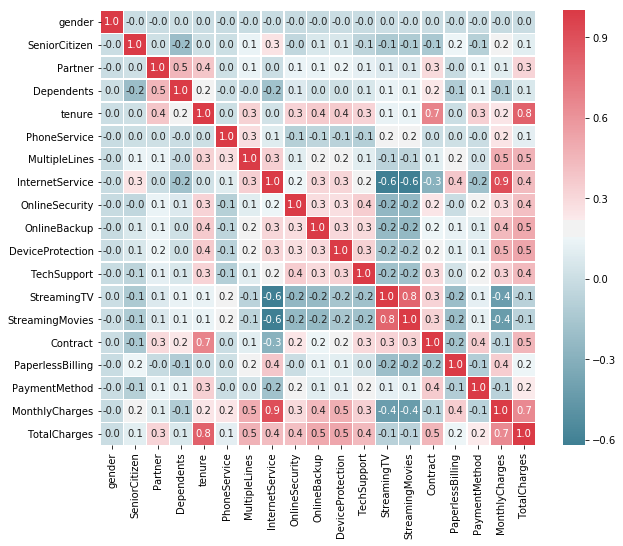

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

From the correlation plot, the tenure is highly correlated to Total charges and Contract which seems to be make sense. 

The total charges will depend upon the tenure for the service taken for the contract. 

The variable Monthly Charges and Internet service are aslo highly correlated. 

The Total charges is also having high correlation with the Monthly charges. The total charges might be a cumulative sum of the monthly charges for the contract or tenure. 

Rest of the features seems to be Ok. 

Generate swarm plot for the features for first few 1000 rows

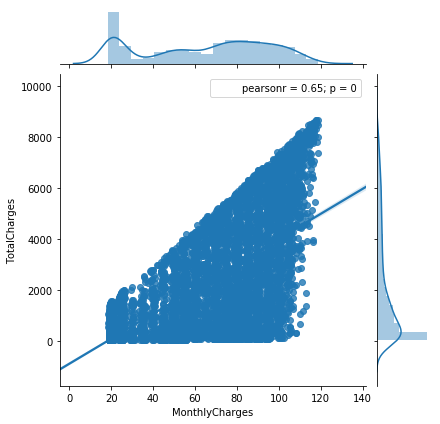

In [19]:
sns.jointplot(X['MonthlyCharges'], X['TotalCharges'],kind="reg")

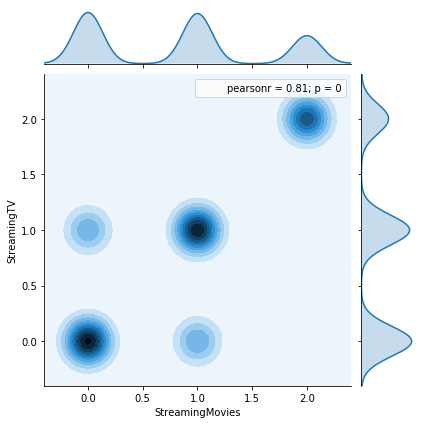

In [20]:
sns.jointplot(X['StreamingMovies'], X['StreamingTV'], kind="kde")

The totalcharges and monthly charges have high correlation between them and we can use a single feature instead of both. 

The totalcharges is usually a cumulative sum of the monthly charges for the services opted. 

Hence we can create a new feature as TotalCharges/MonthlyCharges.  

Same is the case with the monthly charges and the internet services. The more services opted by the customer, higher the charges. 

Hence we can create a new feature charge = MonthlyCharges*InternetService

The customers with streaming services also have high correlation with the StreamingTV and STreamingMovies feature. 

Hence we can create a new feature StreamingService = StreamingTV + STreamingMovies




In [21]:
X['AvgCharges'] = X['TotalCharges'] / X['MonthlyCharges']
X['ChargeForService'] = X['MonthlyCharges'] *  X['InternetService']
X['StreamingService'] = X['StreamingTV'] *  X['StreamingMovies']

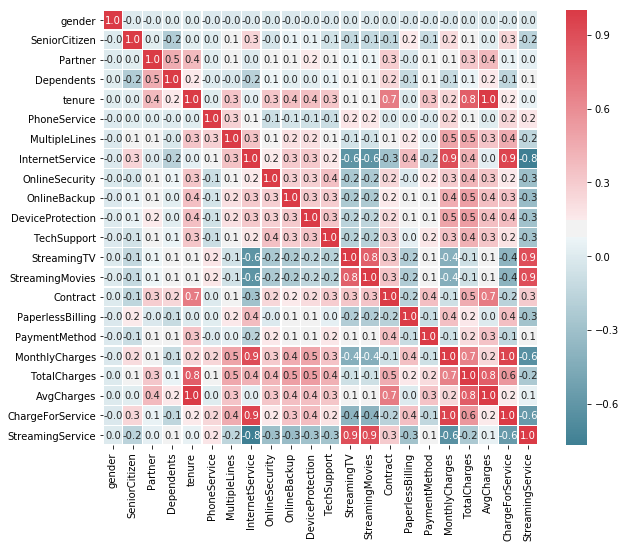

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

Generating swarmplots for visualizing the variance for the different columns. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

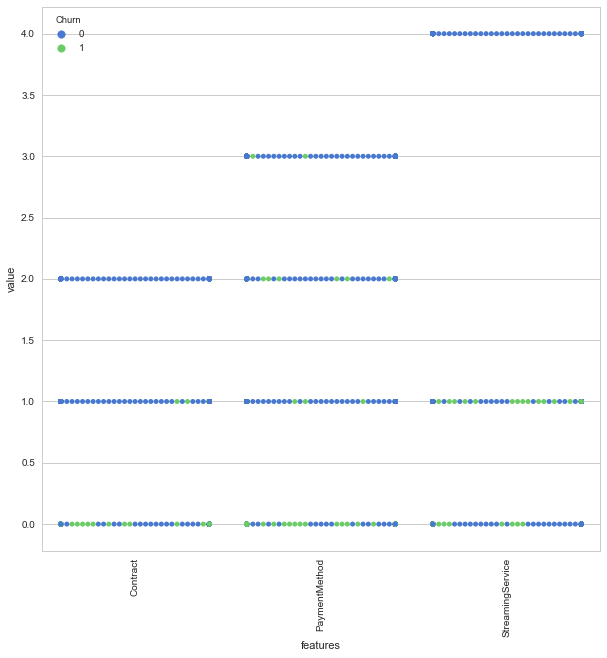

In [23]:
import time
sns.set(style="whitegrid", palette="muted")

df = pd.concat([y.iloc[:1000],X.iloc[:1000][['Contract', 'PaymentMethod','StreamingService']]],axis=1)
df = pd.melt(df,id_vars="Churn",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Churn", data=df)

plt.xticks(rotation=90)


### From the above swarm plots

The customers having either Streaming Services or not seems to be chruned more as compare to having no Internet service.
This would be a good feature for our classification of the customers for churning. 

The people having month-to-month contract also have high probability of churning as compared to people with long term contracts. 

We can also see that people with Payment Method as electronic check and mailed check have higher churning rate as compared to the automatic mode of payment. 
Since, people having automatic mode of payment tends to use th service for a longer time. 



### Normalization

Before Moving Forward, normalizing the values for the features so they all are in same ranges. 

Performing it for both the dataframes . 'X' and 'XHighVar' using MinMaxScaler(). 

This would help in faster execution of our models.

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

In [25]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,ChargeForService,StreamingService
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,1.224118,0.286547,0.344852,...,0.816695,0.820677,0.688567,0.592719,1.315557,64.798208,2283.300441,32.424072,100.527510,1.140358
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.778643,0.452180,0.475354,...,0.762952,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362,24.581795,78.561456,1.560174
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,8.798208,35.587500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,28.831822,75.200000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,55.269025,179.025000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,79.341772,237.500000,4.000000


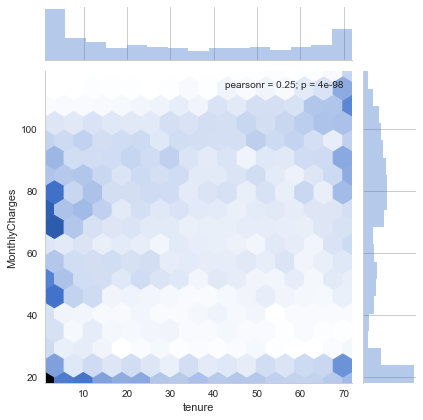

In [26]:
sns.jointplot(X.tenure, X.MonthlyCharges,kind='hex')

In [27]:
xNorm = scaled.fit_transform(X)
xNorm = pd.DataFrame(xNorm, columns=X.columns)
print(xNorm.shape, y.shape)
print(xNorm.isnull().sum())

(7032, 22) (7032,)
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
AvgCharges          0
ChargeForService    0
StreamingService    0
dtype: int64


In [28]:
#xNorm = pd.DataFrame(xNorm)
xNorm.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,ChargeForService,StreamingService
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.612059,0.286547,0.344852,...,0.408348,0.410338,0.344283,0.592719,0.438519,0.463166,0.261309,0.401115,0.423274,0.285090
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.389322,0.452180,0.475354,...,0.381476,0.380644,0.416467,0.491363,0.383174,0.299363,0.261571,0.313776,0.330785,0.390044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.172512,0.044155,0.099541,0.149842,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.500000,0.000000,0.000000,...,0.500000,0.500000,0.000000,1.000000,0.333333,0.518408,0.159090,0.355262,0.316632,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,0.500000,0.500000,1.000000,0.666667,0.712562,0.435719,0.692721,0.753789,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
## Generating the pair plots as well

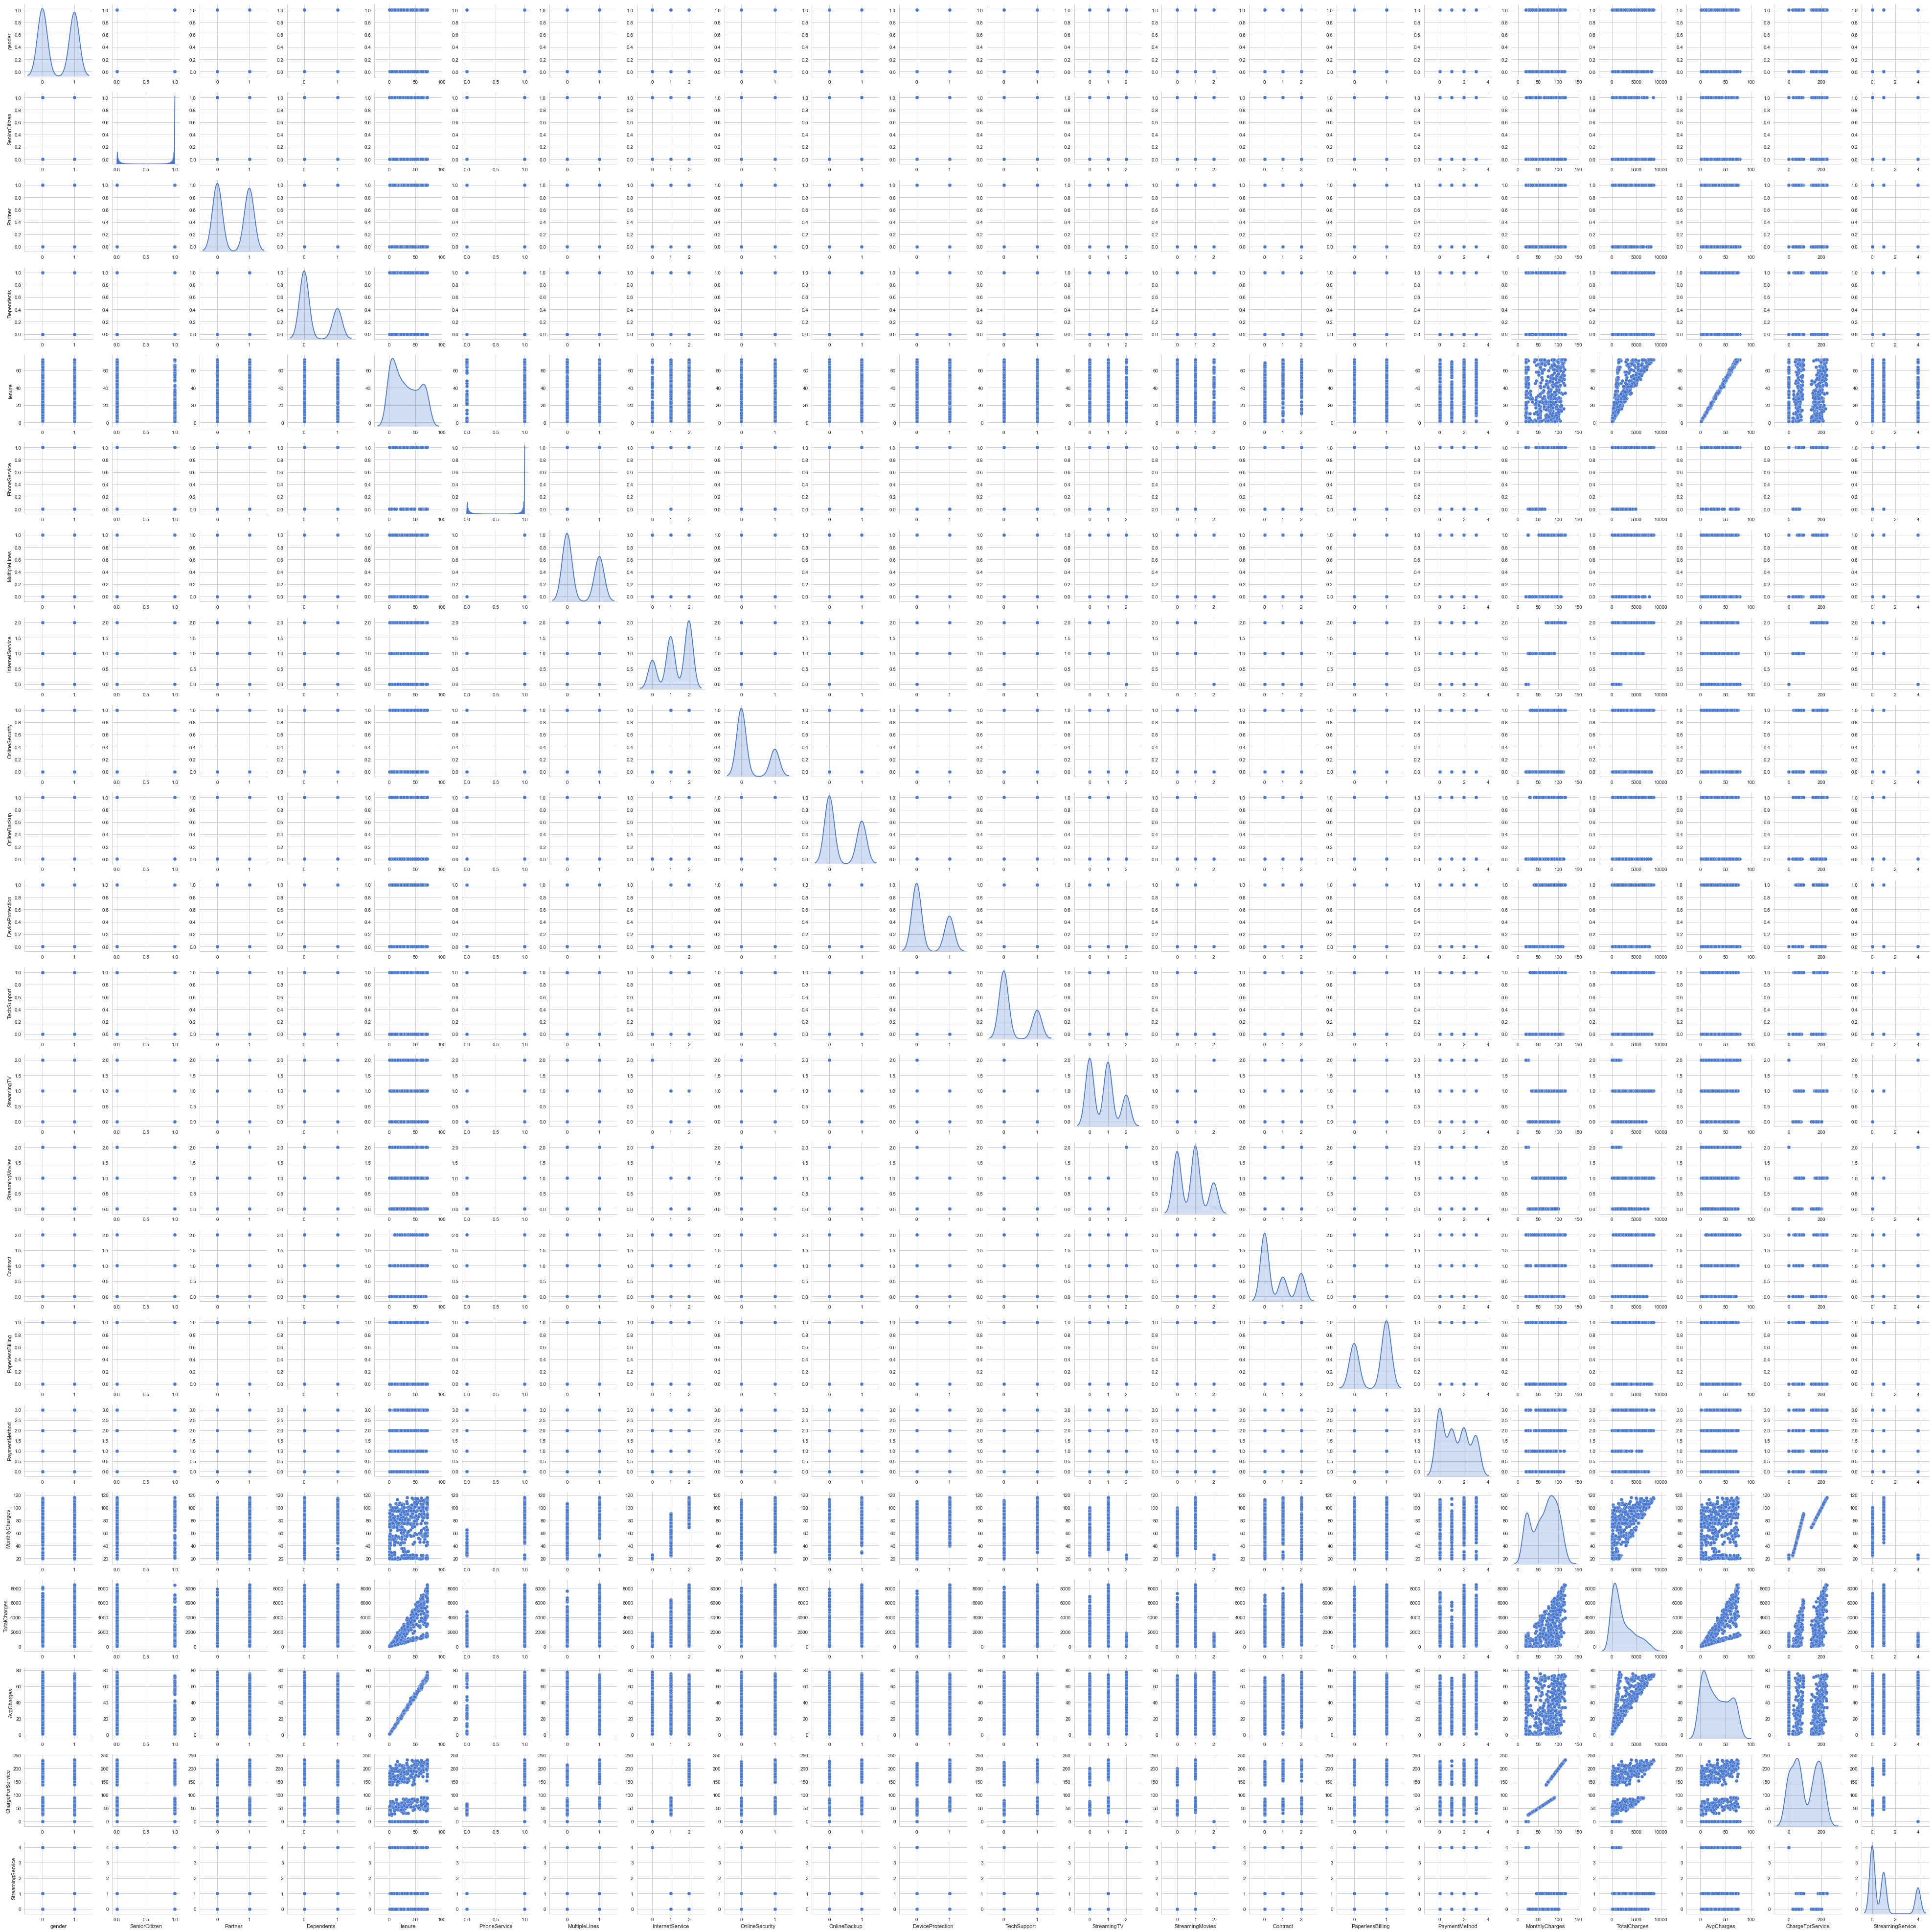

In [30]:
sns.pairplot(X.iloc[:500],
             diag_kind = "kde",palette = "husl",diag_kws=dict(shade=True))
plt.show()

# Checking Model Accuracy and F1-Score with different Classifiers 

##### Import the different classifiers from sklearn and metrics for model comparison

In [31]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, KFold,cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix

In [32]:
y = data['Churn']
y.drop(list(set(y.index).difference(set(X.index))),inplace=True)
print(y.shape, X.shape, xNorm.shape)

(7032,) (7032, 22) (7032, 22)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(xNorm, y, test_size=0.20, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 22) (5625,)
(1407, 22) (1407,)


In [34]:
## Created a dictionary for easily accessing all the classifiers. 

clfs = {
    'svm1': SVC(kernel='linear'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(activation='tanh'),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100,100 ]),
    'ada': AdaBoostClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}


In [35]:
## Create a dictionary for keeping the accuracy for each classifier
def executeClassifiers(X_train, y_train, X_test, y_test):     
    test_acc = dict()
    train_acc = dict()
    testpred =dict()
    for clf_name in clfs:
        kfold = KFold(n_splits=10, shuffle=True)
        clf = clfs[clf_name]
        print(clf)
        cv_acc = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
        y_pred = cross_val_predict(clf, X_test,y_test)
        test_acc[clf_name] = accuracy_score(y_test, y_pred)
        train_acc[clf_name] = cv_acc.mean()
    return train_acc, test_acc

In [36]:
def getaccMatrix(train, test):
    acc_matrix = pd.DataFrame([train, test],columns=train.keys(), index=['Train','Test'])
    acc_matrix = np.transpose(acc_matrix)
    return acc_matrix 

In [37]:
train, test = executeClassifiers(X_train, y_train, X_test, y_test)
acc_matrix = getaccMatrix(train, test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stop

In [38]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AvgCharges,ChargeForService,StreamingService
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.00000,...,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,0.505422,0.161244,0.484267,0.297244,0.440608,0.903289,0.423467,0.614667,0.282667,0.33920,...,0.409422,0.412978,0.340622,0.592178,0.438519,0.463689,0.260121,0.399367,0.425720,0.286311
std,0.500015,0.367789,0.499797,0.457086,0.344709,0.295590,0.494152,0.391168,0.450336,0.47348,...,0.381982,0.380479,0.415166,0.491473,0.383363,0.299913,0.261265,0.312930,0.331765,0.390936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002985,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.500000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.170149,0.044646,0.098714,0.148842,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.500000,0.000000,0.00000,...,0.500000,0.500000,0.000000,1.000000,0.333333,0.519900,0.157749,0.349755,0.320000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.00000,...,0.500000,0.500000,0.500000,1.000000,0.666667,0.713930,0.433037,0.688926,0.754947,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
acc_matrix

,Train,Test
svm1,0.795197,0.804549
svm3,0.797865,0.793177
mlp1,0.798049,0.813788
mlp2,0.777955,0.766880
ada,0.798223,0.790334
rfc,0.780799,0.771144
gbc,0.799468,0.792466
lr,0.797333,0.807392


### Checking Model Accuracy and F1-Score with different Classifiers using top-5 features 

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X, y)

In [41]:
fscore = select_feature.scores_
fDF = pd.DataFrame([fscore, X.columns], index=['Score', 'Columns'])
fDF = fDF.transpose()
fDF.sort_values(['Score'], axis=0,ascending=False, inplace=True)
xTop10Feat = fDF.iloc[:15,1]

In [42]:
xTop10Feat

18        TotalCharges
20    ChargeForService
19          AvgCharges
4               tenure
17      MonthlyCharges
14            Contract
21    StreamingService
16       PaymentMethod
7      InternetService
13     StreamingMovies
12         StreamingTV
8       OnlineSecurity
11         TechSupport
1        SeniorCitizen
3           Dependents
Name: Columns, dtype: object

In [43]:
X[xTop10Feat].head()

,TotalCharges,ChargeForService,AvgCharges,tenure,MonthlyCharges,Contract,StreamingService,PaymentMethod,InternetService,StreamingMovies,StreamingTV,OnlineSecurity,TechSupport,SeniorCitizen,Dependents
0,29.85,29.85,1.000000,1,29.85,0,0,0,1,0,0,0,0,0,0
1,1889.50,56.95,33.178227,34,56.95,1,0,1,1,0,0,1,0,0,0
2,108.15,53.85,2.008357,2,53.85,0,0,1,1,0,0,1,0,0,0
3,1840.75,42.30,43.516548,45,42.30,1,0,2,1,0,0,1,1,0,0
4,151.65,141.40,2.144979,2,70.70,0,0,0,2,0,0,0,0,0,0


In [44]:
corr = X[xTop10Feat].corr

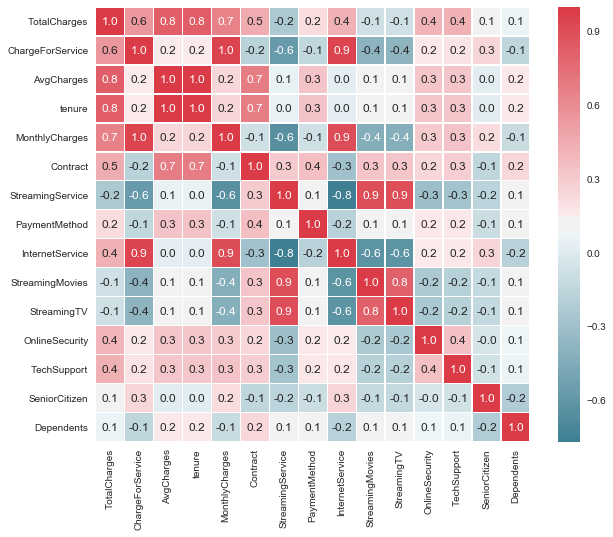

In [45]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X[xTop10Feat].corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(xNorm[xTop10Feat], y, test_size=0.4, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

train, test = executeClassifiers(X_train, y_train, X_test, y_test)
acc_matrix = getaccMatrix(train, test)

acc_matrix



(4219, 15) (4219,)
(2813, 15) (2813,)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_

,Train,Test
svm1,0.785963,0.801280
svm3,0.785024,0.803057
mlp1,0.786210,0.805190
mlp2,0.790479,0.805190
ada,0.790233,0.801280
rfc,0.774124,0.775329
gbc,0.791420,0.793814
lr,0.790945,0.805901


In [47]:
acc_matrix.idxmax()

Train    gbc
Test      lr
dtype: object

## Choosing Best Features for our machine learning model. 



In [48]:
from sklearn.feature_selection import VarianceThreshold

In [49]:
sel = VarianceThreshold(threshold=0.6)

In [50]:
sel.fit(X)

VarianceThreshold(threshold=0.6)

In [51]:
sel.get_params()

{'threshold': 0.6}

In [52]:
x_data_varth = VarianceThreshold(.9).fit_transform(X)

In [ ]:
x_data_varth.shape

(7032, 7)

In [ ]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)